In [22]:
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


In [2]:
sys.path.insert(0, 'D:/spark-brc_gits/swatmf_git/swatmf_pkgs')
import swatmf_viz

In [3]:
base = 'D:/Projects/Watersheds/Okavango/scenarios/okvg_swatmf_calibrated_base_new_res'
bau = 'D:/Projects/Watersheds/Okavango/scenarios/okvg_swatmf_scn_bau_new_res'
rd = 'D:/Projects/Watersheds/Okavango/scenarios/okvg_swatmf_scn_rd_new_res'

In [6]:
os.chdir(base)
a = swatmf_viz.str_df('1/1/2003', 240, 'M')

In [7]:
a

,str_sim
2003-01-31,342.90
2003-02-28,474.00
2003-03-31,499.30
2003-04-30,428.20
2003-05-31,416.50
...,...
2019-08-31,112.10
2019-09-30,88.16
2019-10-31,73.11
2019-11-30,102.60


In [15]:
tot_df = pd.DataFrame()
for i, j in zip([base, bau, rd], ['base', 'bau', 'rd']):
    os.chdir(i)
    df = swatmf_viz.str_df('1/1/2003', 240, 'M')
    df.rename(columns = {'str_sim':j}, inplace = True)
    tot_df = pd.concat([tot_df, df], axis=1,)


In [13]:
str(base)

'D:/Projects/Watersheds/Okavango/scenarios/okvg_swatmf_calibrated_base_new_res'

In [16]:
tot_df

,base,bau,rd
2003-01-31,342.90,341.70,338.00
2003-02-28,474.00,423.00,474.10
2003-03-31,499.30,380.10,497.80
2003-04-30,428.20,408.80,427.30
2003-05-31,416.50,409.50,414.20
...,...,...,...
2019-08-31,112.10,102.20,104.80
2019-09-30,88.16,79.51,81.47
2019-10-31,73.11,68.73,68.40
2019-11-30,102.60,88.10,92.92


In [18]:
mon_df = tot_df.groupby(tot_df.index.month).mean()


In [19]:
mon_df

,base,bau,rd
1,287.429412,277.058824,284.276471
2,433.352941,352.876471,432.047059
3,474.958824,370.664706,473.941176
4,472.135294,403.317647,470.794118
5,356.500000,332.552941,351.558824
6,219.470588,213.294118,212.958824
7,170.976471,182.676471,166.111765
8,146.070588,156.605882,142.870588
9,125.305882,128.748824,121.765294
10,119.374118,122.048235,114.398235


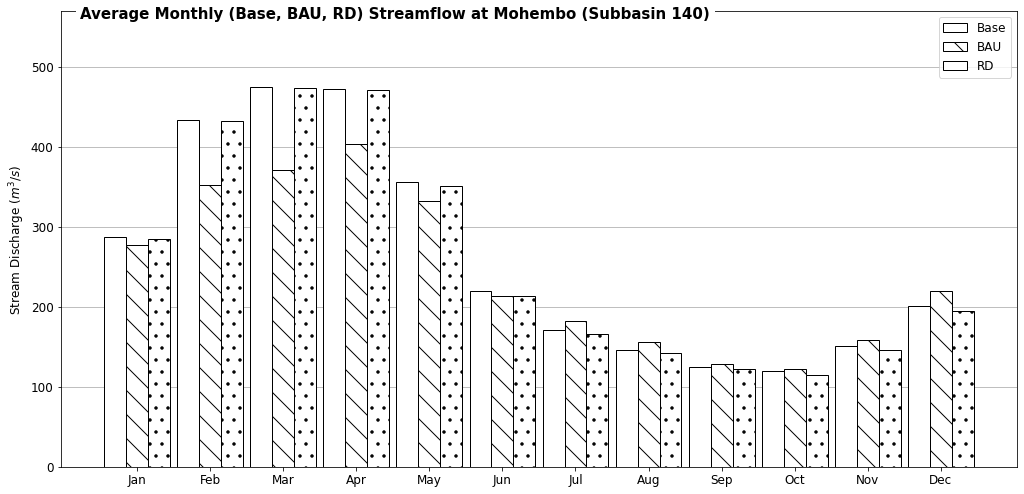

In [28]:
fig, ax = plt.subplots( 
                # sharex=True,
                figsize=(14,7)
                )
# x = date2num(mon_df.index)
w = 0.3
ax.bar(mon_df.index-0.3, mon_df.base, width=w, align='center', label='Base', hatch='', color='white', edgecolor='black', zorder=3)
ax.bar(mon_df.index, mon_df.bau, width=w, align='center', label='BAU', hatch='//', color='white', edgecolor='black', zorder=3)
ax.bar(mon_df.index+0.3, mon_df.rd, width=w, align='center', label='RD', hatch='.', color='white', edgecolor='black', zorder=3)

# for index, value in zip(mon_df.index-0.2, mon_df.base):
#     ax.text(
#         index-0.1, value+10000, '{:3.0f}'.format(value/1000),
#         fontsize=12, rotation=0, horizontalalignment='center')
# for index, value in zip(mon_df.index, mon_df.bau):
#     ax.text(index, value+10000, '{:3.0f}'.format(value/1000), fontsize=12, rotation=0, horizontalalignment='center')
# for index, value in zip(mon_df.index, mon_df.rd):
#     ax.text(index+0.3, value+10000, '{:3.0f}'.format(value/1000), fontsize=12, rotation=0, horizontalalignment='center')


ax.yaxis.set_major_formatter(FuncFormatter(swatmf_viz.y_fmt))


ax.tick_params(axis='both', labelsize=12)
# plt.setp(ax.get_xticklabels(), rotation=70)
# ax.set_xticks(mon_df.index[::1])
# ax.xaxis_date()
# plt.xticks[1].set_visible(False)
ax.set_xticks(mon_df.index[::1])
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(month_names)
ax.margins(y=0.2)
ax.set_title(
    # 'Average Monthly (Base, BAU, RD) Streamflow at Mucundi (Subbasin 137)', # streamflow
    'Average Monthly (Base, BAU, RD) Streamflow at Mohembo (Subbasin 140)', #sed
    fontsize=15,
    fontweight="bold",
    horizontalalignment='left',
    x=0.02,
    y=0.97,
    bbox=dict(
        facecolor='white',
        edgecolor='white'))
# ax.autoscale(tight=True)
plt.tight_layout()
ax.legend(fontsize=12)
ax.grid(axis='y', zorder=0)
ax.set_ylabel(r'Stream Discharge $(m^3/s)$', fontsize = 12)
# ax.set_ylabel(r'Sediment Yield $(Kiloton/month)$', fontsize = 12)
# plt.savefig('am_mucundi_ff_sed.png', dpi=300, bbox_inches="tight")
plt.show()

In [29]:
base = 'D:/Projects/Watersheds/Okavango/scenarios/okvg_swatmf_scn_climates/scn_model_results_2020-2050/base_ssp245-inm-cm5-0_results'
bau = 'D:/Projects/Watersheds/Okavango/scenarios/okvg_swatmf_scn_climates/scn_model_results_2020-2050/bau_ssp245-inm-cm5-0_results'
rd = 'D:/Projects/Watersheds/Okavango/scenarios/okvg_swatmf_scn_climates/scn_model_results_2020-2050/rd_ssp245-inm-cm5-0_results'

In [30]:
tot_df = pd.DataFrame()
for i, j in zip([base, bau, rd], ['base', 'bau', 'rd']):
    os.chdir(i)
    df = swatmf_viz.str_df('1/1/2020', 240, 'M')
    df.rename(columns = {'str_sim':j}, inplace = True)
    tot_df = pd.concat([tot_df, df], axis=1,)
mon_df = tot_df.groupby(tot_df.index.month).mean()

In [31]:
mon_df

,base,bau,rd
1,229.061290,225.274194,226.819355
2,389.503226,384.232258,388.322581
3,456.300000,449.106452,454.838710
4,422.035484,410.158065,419.612903
5,287.735484,270.129032,282.229032
6,167.303226,155.258065,161.748387
7,130.777419,125.006452,127.325806
8,111.392258,104.050645,106.428065
9,86.601613,78.041935,80.162903
10,77.526129,68.309355,71.581935


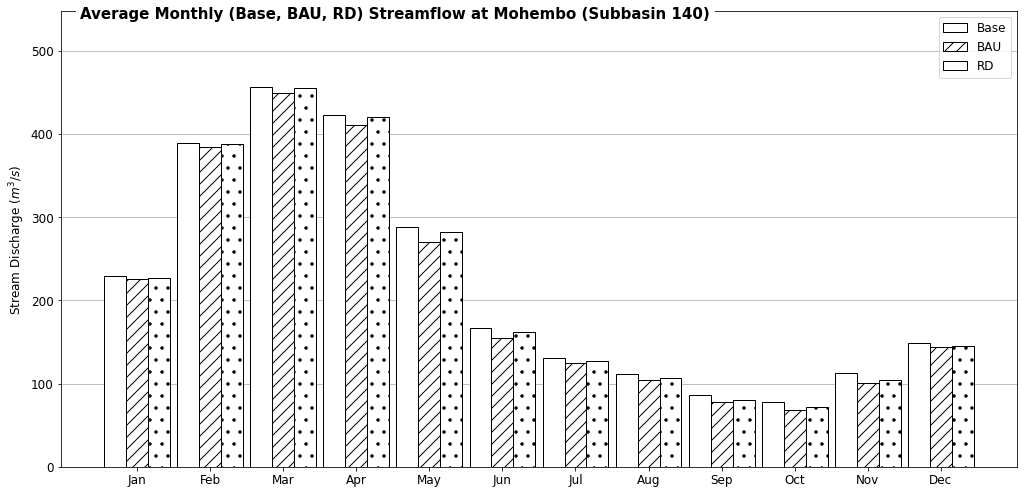

In [32]:
fig, ax = plt.subplots( 
                # sharex=True,
                figsize=(14,7)
                )
# x = date2num(mon_df.index)
w = 0.3
ax.bar(mon_df.index-0.3, mon_df.base, width=w, align='center', label='Base', hatch='', color='white', edgecolor='black', zorder=3)
ax.bar(mon_df.index, mon_df.bau, width=w, align='center', label='BAU', hatch='//', color='white', edgecolor='black', zorder=3)
ax.bar(mon_df.index+0.3, mon_df.rd, width=w, align='center', label='RD', hatch='.', color='white', edgecolor='black', zorder=3)

# for index, value in zip(mon_df.index-0.2, mon_df.base):
#     ax.text(
#         index-0.1, value+10000, '{:3.0f}'.format(value/1000),
#         fontsize=12, rotation=0, horizontalalignment='center')
# for index, value in zip(mon_df.index, mon_df.bau):
#     ax.text(index, value+10000, '{:3.0f}'.format(value/1000), fontsize=12, rotation=0, horizontalalignment='center')
# for index, value in zip(mon_df.index, mon_df.rd):
#     ax.text(index+0.3, value+10000, '{:3.0f}'.format(value/1000), fontsize=12, rotation=0, horizontalalignment='center')


ax.yaxis.set_major_formatter(FuncFormatter(swatmf_viz.y_fmt))


ax.tick_params(axis='both', labelsize=12)
# plt.setp(ax.get_xticklabels(), rotation=70)
# ax.set_xticks(mon_df.index[::1])
# ax.xaxis_date()
# plt.xticks[1].set_visible(False)
ax.set_xticks(mon_df.index[::1])
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(month_names)
ax.margins(y=0.2)
ax.set_title(
    # 'Average Monthly (Base, BAU, RD) Streamflow at Mucundi (Subbasin 137)', # streamflow
    'Average Monthly (Base, BAU, RD) Streamflow at Mohembo (Subbasin 140)', #sed
    fontsize=15,
    fontweight="bold",
    horizontalalignment='left',
    x=0.02,
    y=0.97,
    bbox=dict(
        facecolor='white',
        edgecolor='white'))
# ax.autoscale(tight=True)
plt.tight_layout()
ax.legend(fontsize=12)
ax.grid(axis='y', zorder=0)
ax.set_ylabel(r'Stream Discharge $(m^3/s)$', fontsize = 12)
# ax.set_ylabel(r'Sediment Yield $(Kiloton/month)$', fontsize = 12)
# plt.savefig('am_mucundi_ff_sed.png', dpi=300, bbox_inches="tight")
plt.show()